In [1]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.5 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0)
ERROR: No matching distribution found for torch==1.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=20ae65ed66569e362af8e886aef81881112b3327272a7638458a8e1c5a9c1252
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully

In [2]:
import sys, os, distutils.core
dist = distutils.core.run_setup("/content/maskrcnn/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./maskrcnn'))

Cloning into 'detectron2'...
remote: Enumerating objects: 15022, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 15022 (delta 23), reused 35 (delta 17), pack-reused 14975
Receiving objects: 100% (15022/15022), 6.10 MiB | 18.59 MiB/s, done.
Resolving deltas: 100% (10888/10888), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117

In [3]:
import maskrcnn
from maskrcnn.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common maskrcnn utilities
from maskrcnn import model_zoo
from maskrcnn.engine import DefaultPredictor
from maskrcnn.config import get_cfg
from maskrcnn.utils.visualizer import Visualizer
from maskrcnn.data import MetadataCatalog
from maskrcnn.data.catalog import DatasetCatalog

!curl -L "https://app.roboflow.com/ds/7jLbXLRcaD?key=C4mJekU97w" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [4]:
!curl -L "https://app.roboflow.com/ds/0A4foOd2Pr?key=D3tQRr7qwG" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/1_5657_png.rf.d2aa4df1e1c2bf4bb4142ab1d44d4484.jpg  
 extracting: train/1_5657_png.rf.dfff04ba5ce325b86cd0765b23b1d8b1.jpg  
 extracting: train/1_5662_png.rf.0df00ba8281d9e6ba989f7c102aecfb3.jpg  
 extracting: train/1_5662_png.rf.2b9c0e859e969c1631cfafb3c587b8bb.jpg  
 extracting: train/1_5662_png.rf.85bfc106607e8d7548ed3c3a1a02b20b.jpg  
 extracting: train/1_5669_png.rf.4f63d17e3b8fabe7c4eac12017739b85.jpg  
 extracting: train/1_5669_png.rf.5439e7c2956ee52929895d36bad43a07.jpg  
 extracting: train/1_5669_png.rf.9e861eff329862516e4e27e19723e93c.jpg  
 extracting: train/1_5670_png.rf.13c9ba03a74168ea6ff75b52dcf01196.jpg  
 extracting: train/1_5670_png.rf.308ec717925a29e92dff1720b92809e4.jpg  
 extracting: train/1_5670_png.rf.c59179ad9df29a181b608fb1828936b8.jpg  
 extracting: train/1_5675_png.rf.221b43fc50c2228cffd046203c4c92fb.jpg  
 extracting: train/1_5675_png.rf.86333047c1a81f5cc54d3d1e2119a8fe.jpg  
 extracting: 

In [5]:
from maskrcnn.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

WARNING [05/02 10:40:32 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/02 10:40:32 d2.data.datasets.coco]: Loaded 6582 images in COCO format from /content/train/_annotations.coco.json


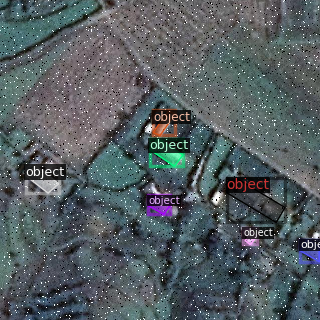

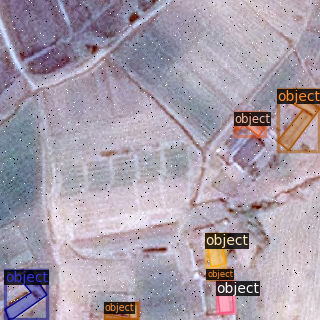

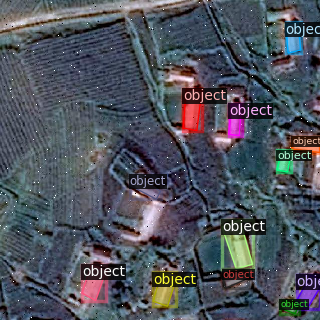

In [6]:
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from maskrcnn.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [7]:
from maskrcnn.engine import DefaultTrainer
from maskrcnn.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [9]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.025
cfg.SOLVER.MAX_ITER = 2000    
cfg.SOLVER.STEPS = []        
PATIENCE =  300
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[05/02 10:57:55 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[05/02 10:57:56 d2.engine.train_loop]: Starting training from iteration 0
[05/02 10:58:04 d2.utils.events]:  eta: 0:12:49  iter: 19  total_loss: 2.031  loss_cls: 0.5666  loss_box_reg: 0.2359  loss_mask: 0.6836  loss_rpn_cls: 0.29  loss_rpn_loc: 0.05556    time: 0.3987  last_time: 0.4367  data_time: 0.0224  last_data_time: 0.0157   lr: 0.00049953  max_mem: 2953M
[05/02 10:58:13 d2.utils.events]:  eta: 0:13:24  iter: 39  total_loss: 1.351  loss_cls: 0.2875  loss_box_reg: 0.3938  loss_mask: 0.5372  loss_rpn_cls: 0.09849  loss_rpn_loc: 0.04756    time: 0.4148  last_time: 0.4006  data_time: 0.0087  last_data_time: 0.0051   lr: 0.00099902  max_mem: 3017M
[05/02 10:58:21 d2.utils.events]:  eta: 0:13:22  iter: 59  total_loss: 1.161  loss_cls: 0.2433  loss_box_reg: 0.4555  loss_mask: 0.4028  loss_rpn_cls: 0.05676  loss_rpn_loc: 0.0385    time: 0.4203  last_time: 0.4566  data_time: 0.0093  last_data_time: 0.0195   lr: 0.0014985  max_mem: 3054M
[05/02 10:58:31 d2.utils.events]:  eta: 0:13:38  ite

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.025
cfg.SOLVER.MAX_ITER = 3000    
cfg.SOLVER.STEPS = []        
PATIENCE =  300
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

In [10]:
from maskrcnn.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from maskrcnn.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[05/02 11:14:31 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
[05/02 11:14:31 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [05/02 11:14:31 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [05/02 11:14:31 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/02 11:14:31 d2.data.datasets.coco]: Loaded 314 images in COCO format from /content/test/_annotations.coco.json
[05/02 11:14:31 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|  Building  | 0            |   object   | 2464         |
|            |              |            |              |
|   total    | 2464         |  

OrderedDict([('bbox',
              {'AP': 39.846168962720405,
               'AP50': 75.75669458110771,
               'AP75': 37.42051043519883,
               'APs': 23.329119821090348,
               'APm': 42.4447669758561,
               'APl': 34.669075961813256,
               'AP-Building': nan,
               'AP-object': 39.846168962720405}),
             ('segm',
              {'AP': 38.33202058427891,
               'AP50': 75.47515317815952,
               'AP75': 34.70889576472349,
               'APs': 12.360261005701895,
               'APm': 41.776392884702446,
               'APl': 37.049185465108295,
               'AP-Building': nan,
               'AP-object': 38.33202058427891})])

In [11]:
%cd /content/output

/content/output


[05/02 11:24:05 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


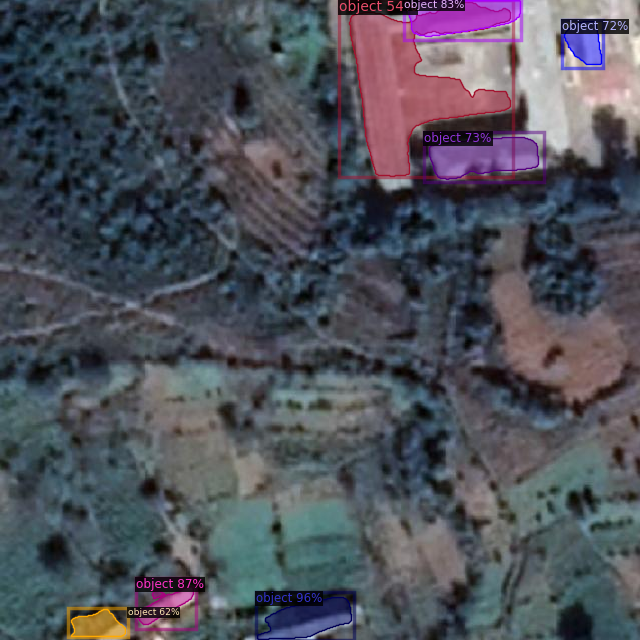

In [14]:
from detectron2.utils.visualizer import ColorMode
import glob
cfg.MODEL.WEIGHTS = os.path.join("/content/output", "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")
im = cv2.imread("/content/test/2_3010_png.rf.2c6a62f0015a62e531e1ab1c522462db.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],metadata=test_metadata, scale=1)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])